Series of N equals in coin tosses
======

For a fair coin, the question if it lands heads or tails is easily answered. Almost as simple is the question of what is the probability of having N heads (tails) in a row. However, it is not immediately obvious how we would answer a question like "How many tosses do we need to make before we will observe a series of N heads (tails)?". The answer is easily computed numerically and we will show an analytical solution in the end.

Numerical experiment
------

###Python imports

In [76]:
import random as rd
import numpy as np
from numpy.random import choice
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.rc_params_from_file("../styles/matplotlibrc" ).update()

### Constructing the experiment

It is obvious that to observe a series of N equals we need to have done N throws at least. Hence we initialize the experiment by tossing the coin N times. We define the categories as "H" and "T"

In [3]:
list_of_categories = ["H", "T"]

In [4]:
def initializeExperiment(N, prob = [0.5, 0.5]):
    tosses = []
    for idx in range(N):
        tosses.append(choice(list_of_categories, p = prob))
    return tosses

Next we need to check if the last N throws have been equal to the category we want to observe. To do this we construct a set of the last N tosses. If the size of the set is 1 and the category in the set is the one we are looking for we found a sequence of N equal tosses.

In [5]:
def areLastNTossesEqualy(tosses, N, category):
    subset = set(tosses[-N:])
    if ((len(subset) == 1) and (category in subset)):
        return True
    else:
        return False

###Running the experiment

Since we have no prior knowledge of when the experiment will terminate we limit ourselves to a maximum number of tosses. We always check if the last N tosses have been heads (H). If yes, we terminate otherwise we continue with another toss.

In [6]:
def runSingleExperiment(max_num_throws, number_of_equals, prob = [0.5,0.5]):
    tosses = initializeExperiment(number_of_equals, prob)
    throws = 0
    while throws < max_num_throws:
        if areLastNTossesEqualy(tosses, number_of_equals, "H"):
            return len(tosses)
        else:
            tosses.append(choice(list_of_categories))
        throws += 1

Finally we want to run M experiments and evaluate for the expected number of throws.

In [61]:
def runKExperimentsAndEvaluate(m_experiments, number_of_equals, number_of_maximum_tosses=500, prob = [0.5,0.5]):
    number_of_tosses = []
    for idx in range(m_experiments):
        number_of_tosses.append(runSingleExperiment(number_of_maximum_tosses, number_of_equals, prob))

    return np.mean(number_of_tosses), np.std(number_of_tosses), number_of_tosses

So for 3 heads in a row, what's the expected number of tosses to observe this event"

In [62]:
print "We expect to observe 3 heads after %3.2f tosses" % runKExperimentsAndEvaluate(5000, 3)[0]

We expect to observe 3 heads after 13.97 tosses


As we will see later the non-integer nature of this expectation value is a residual of the numerical procedure we employed and it could easily be cast to an integer.
Before we get into the mathematical formulation of the problem, let's study the distribution a little bit more. A good way to gain some insight into the distribution is to look at the normalized histogram of the number of total throws until success. To this end we take a look at the raw tosses returned by `runKExperimentsAndEvaluate`

In [112]:
tosses_three_equals = runKExperimentsAndEvaluate(25000, 3, number_of_maximum_tosses=1000)[2]
tosses_four_equals = runKExperimentsAndEvaluate(25000, 4, number_of_maximum_tosses=1000)[2]
tosses_five_equals = runKExperimentsAndEvaluate(25000, 5, number_of_maximum_tosses=1000)[2]

(0, 100)

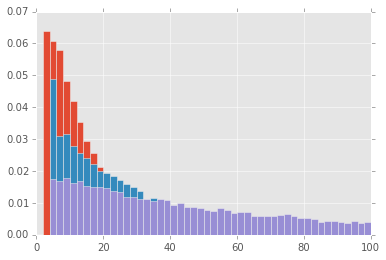

In [123]:
bin_range = range(0,150, 2)
plt.hist(tosses_three_equals, bins=bin_range, normed=True)
plt.hist(tosses_four_equals, bins=bin_range, normed=True)
plt.hist(tosses_five_equals, bins=bin_range, normed=True)
plt.xlim([0,100])

Maybe surprisingly the distribution is not very well localized. In fact trying to fit it with an exponential function given the calculated mean fails. Increasing the number of required equals makes the curve flatter and more heavy tailed. Thus the variance itself is also large. In fact it is of the same order as the mean!

Mathematical calculation of the expectation value
------

Let us now turn towards the mathematical calculation of the expectation value. Note that we define success as the event $X$ where we have $n$ heads in a row. It is then easy to see that in whenever we observe tails we essentially waisted all tries before and need to start over again. However, we need to keep track of the wasted throws. If $p$ is the probability of having the coin land on head then the expectation value can be expressed simply by
\begin{align}
E(X) = np^n + (1-p) \left[E(X) +1\right] + p(1-p) \left[E(X) +2\right] +  p^2(1-p) \left[E(X) +3\right]...  = np^n + (1-p)\sum\limits_{i=0}^{n-1}p^i\left[E(X)+i+1\right)
\end{align}

Evaluating the sum we find the simple expression:
\begin{align}
E(X) = \frac{1-p^n}{p^n(1-p)}
\end{align}

To gain some understanding why above formula works let us look closer at the case for two eqaual tosses. In this case we have success if $X=HH$. To calculate the probability of this event happening we condition on the first toss, i.e. we calculate
\begin{align}
E(X) = E(X|H) p(H) + E(X|T) p(T)
\end{align}
where the condition is the result of the first toss. Expanding this some more we get
\begin{align}
E(X) = p^2 + (1-p) \left[E(X) + 1\right]
\end{align}
where we employed the same argument as above.

In [126]:
def expectationValueForNumberOfTosses(p, number_of_equals):
    return int(float(1 - np.power(p, number_of_equals))/float(np.power(p, number_of_equals) * (1-p)))

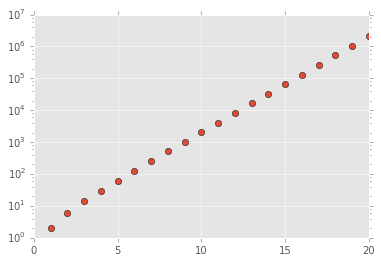

In [139]:
equals = np.linspace(1,20, 20)
y = []
for x in equals:
    y.append(expectationValueForNumberOfTosses(0.5, x))

plt.semilogy( equals, y, 'o')

From the plot aboe we see that the number of tosses until we have $N$ equals grows exponential! (Observe the logarithmic scale). For $N=20$ heads in a row we need on the order of 2 million successive throws for a fair coin. If we could manually throw a coin every second, it would take us about 23 days of uniterupted coin tossing until we could expect 20 heads in a row to appear... but remember: The distribution has a heavy tail and the variance is also on the order of 23 days! 

Summary
------

We did some numerical experiments to investigate the question how many times we need to throw a coin before we can expect $N$ heads in a row. The distribution of this problem is surprisingly heavy tailed and becomes heavier the more heads are required. We saw that the variance is as large as the expectation value, which grows exponential with the number of required equals as we proved mathematically.

Enjoy this notebook! Contributions and/or feedback are welcome as always!

###Stylesheet

In [142]:
from IPython.core.display import HTML

def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()